https://colab.research.google.com/drive/1DGkuliNA3RndrzyfMvx2GW_Bbvxly36i?usp=sharing#scrollTo=7LXoBKQIvMlg

# Topic Modeling
### ... in a nutshell:

<img src="https://moj-analytical-services.github.io/NLP-guidance/LDAresults.png" alt="lda" style="width: 600px;"/>

Partially pased on [this blogpost](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/) by Selva Prabhakaran.

Also Topic Modeling via Scikit-Learn by
Aneesha Bakharia: [blogpost](https://towardsdatascience.com/topic-modeling-for-everybody-with-google-colab-2f5cdc99a647) and [notebook](https://colab.research.google.com/github/aneesha/googlecolab_topicmodeling/blob/master/colab_topicmodeling.ipynb#scrollTo=onfGom6U9oSq)

Another variant for TopicModeling — [BERTopic](https://huggingface.co/blog/bertopic)

In [ ]:
import sys
import re, numpy as np
from pprint import pprint
import pandas as pd

We will need to draw some plots:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

We again use Gensim library, but now we work with its topic modelling features.

In [ ]:
# Gensim
import gensim
from gensim.utils import simple_preprocess  # lemmatize
from gensim import corpora

In [ ]:
import nltk
nltk.download(['stopwords', 'punkt', 'omw-1.4'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

NLTK toolkit provides us with a corpus and additional tools:

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
# stop_words = []

In [ ]:
# Import Dataset
import nltk
nltk.download('gutenberg')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Let us take Lewis Carroll's "Alice in Wonderland" and preprocess it:

### Alice text

In [ ]:
alice = nltk.corpus.gutenberg.sents('carroll-alice.txt')
pd.Series(alice)

0       [[, Alice, ', s, Adventures, in, Wonderland, b...
1                                         [CHAPTER, I, .]
2                            [Down, the, Rabbit, -, Hole]
3       [Alice, was, beginning, to, get, very, tired, ...
4       [So, she, was, considering, in, her, own, mind...
                              ...                        
1698    [But, her, sister, sat, still, just, as, she, ...
1699    [First, ,, she, dreamed, of, little, Alice, he...
1700    [The, long, grass, rustled, at, her, feet, as,...
1701    [So, she, sat, on, ,, with, closed, eyes, ,, a...
1702    [Lastly, ,, she, pictured, to, herself, how, t...
Length: 1703, dtype: object

### Bigrams

In [ ]:
# Build the bigram frozen model
phrases_params = dict(min_count=5, threshold=5, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
bigram = gensim.models.Phrases(alice, **phrases_params) # higher threshold fewer phrases.
bigram_frozen = gensim.models.phrases.Phraser(bigram)
bigram_vocab = pd.Series(bigram.vocab)
bigram_vocab[bigram_vocab > 5]

Alice           396
'              1732
Alice_'          11
s               195
'_s             195
               ... 
King_.           12
,'_the_King      10
King_said         8
witness          10
evidence          6
Length: 1157, dtype: int64

In [ ]:
bigram_frozen[['King', 'said', 'Alice', "'", 's']]

['King', 'said_Alice', "'_s"]

### Trigrams

In [ ]:
# Build the trigram models
trigram = gensim.models.Phrases(bigram[alice], **phrases_params)
trigram_frozen = gensim.models.phrases.Phraser(trigram)
trigram_vocab = pd.Series(trigram.vocab)
trigram_vocab[trigram_vocab > 5]

Alice          325
'_s            195
Alice_'_s       10
CHAPTER         12
I              353
              ... 
,'_the_King     10
King_said        8
witness         10
King_.           9
evidence         6
Length: 1082, dtype: int64

In [ ]:
trigram_frozen[bigram_frozen[['King', 'said', 'Alice', "'", 's']]]

['King', 'said_Alice', "'_s"]

### preprocess

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def process_words(texts):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in doc if word not in stop_words] for doc in texts]
    texts = [bigram_frozen[doc] for doc in texts]
    texts = [trigram_frozen[bigram_frozen[doc]] for doc in texts]
    # return texts
    texts_out = []
    for sent in texts:
        texts_out.append([wnl.lemmatize(token) for token in sent])
    # remove stopwords after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    return texts_out

data_ready = process_words(alice)  # processed Text Data!
pd.DataFrame({'Alice': alice, 'Prepared': data_ready})

,Alice,Prepared
0,"[[, Alice, ', s, Adventures, in, Wonderland, b...","[alice, adventures, wonderland, lewis, carroll]"
1,"[CHAPTER, I, .]",[chapter]
2,"[Down, the, Rabbit, -, Hole]","[rabbit, hole]"
3,"[Alice, was, beginning, to, get, very, tired, ...","[alice, beginning, tired, sitting, sister, ban..."
4,"[So, she, was, considering, in, her, own, mind...","[considering, mind, well, hot, day, made, feel..."
...,...,...
1698,"[But, her, sister, sat, still, just, as, she, ...","[sister, sat, still, left, leaning, head, hand..."
1699,"[First, ,, she, dreamed, of, little, Alice, he...","[first, dreamed, little, alice, tiny, hand, cl..."
1700,"[The, long, grass, rustled, at, her, feet, as,...","[long, grass, rustled, foot, white_rabbit, hur..."
1701,"[So, she, sat, on, ,, with, closed, eyes, ,, a...","[sat, closed, eye, half, believed, wonderland,..."


# Create Dictionary
Create Corpus: Term Document Frequency

In [ ]:
id2word = corpora.Dictionary(data_ready)

In [ ]:
id2word.doc2bow(['alice', 'alice', 'rabbit', 'alice'])

[(1, 3), (7, 1)]

In [ ]:
# Create Corpus: Term Document Frequency
import pandas as pd

corpus = [id2word.doc2bow(text) for text in data_ready]
pd.DataFrame({"doc2bow": corpus[:5], "words": data_ready[:5]})

,doc2bow,words
0,"[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]","[alice, adventures, wonderland, lewis, carroll]"
1,"[(5, 1)]",[chapter]
2,"[(6, 1), (7, 1)]","[rabbit, hole]"
3,"[(1, 2), (8, 1), (9, 1), (10, 2), (11, 2), (12...","[alice, beginning, tired, sitting, sister, ban..."
4,"[(21, 1), (22, 1), (23, 1), (24, 2), (25, 1), ...","[considering, mind, well, hot, day, made, feel..."


The topic modelling we use is Latent Dirichlet Allocation. We have to skip the details here, but you can find all the details in [the original paper](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf).

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.034*"alice" + 0.022*"slate" + 0.022*"time" + 0.019*"jury" + 0.019*"never" '
  '+ 0.016*"grown" + 0.016*"way" + 0.015*"hand" + 0.014*"must" + 0.014*"hear"'),
 (1,
  '0.042*"king" + 0.032*"voice" + 0.027*"change" + 0.024*"white_rabbit" + '
  '0.021*"one" + 0.018*"teacup" + 0.017*"sob" + 0.016*"shrill" + '
  '0.015*"said_alice" + 0.013*"air"'),
 (2,
  '0.048*"said" + 0.026*"long" + 0.023*"pig" + 0.021*"knew" + 0.020*"child" + '
  '0.019*"simple" + 0.019*"head" + 0.016*"hatter" + 0.015*"half" + '
  '0.014*"keep"'),
 (3,
  '0.042*"queen" + 0.040*"little" + 0.028*"eye" + 0.027*"mock_turtle" + '
  '0.015*"day" + 0.014*"gave" + 0.013*"place" + 0.013*"lizard" + '
  '0.011*"duchess" + 0.011*"dream"')]


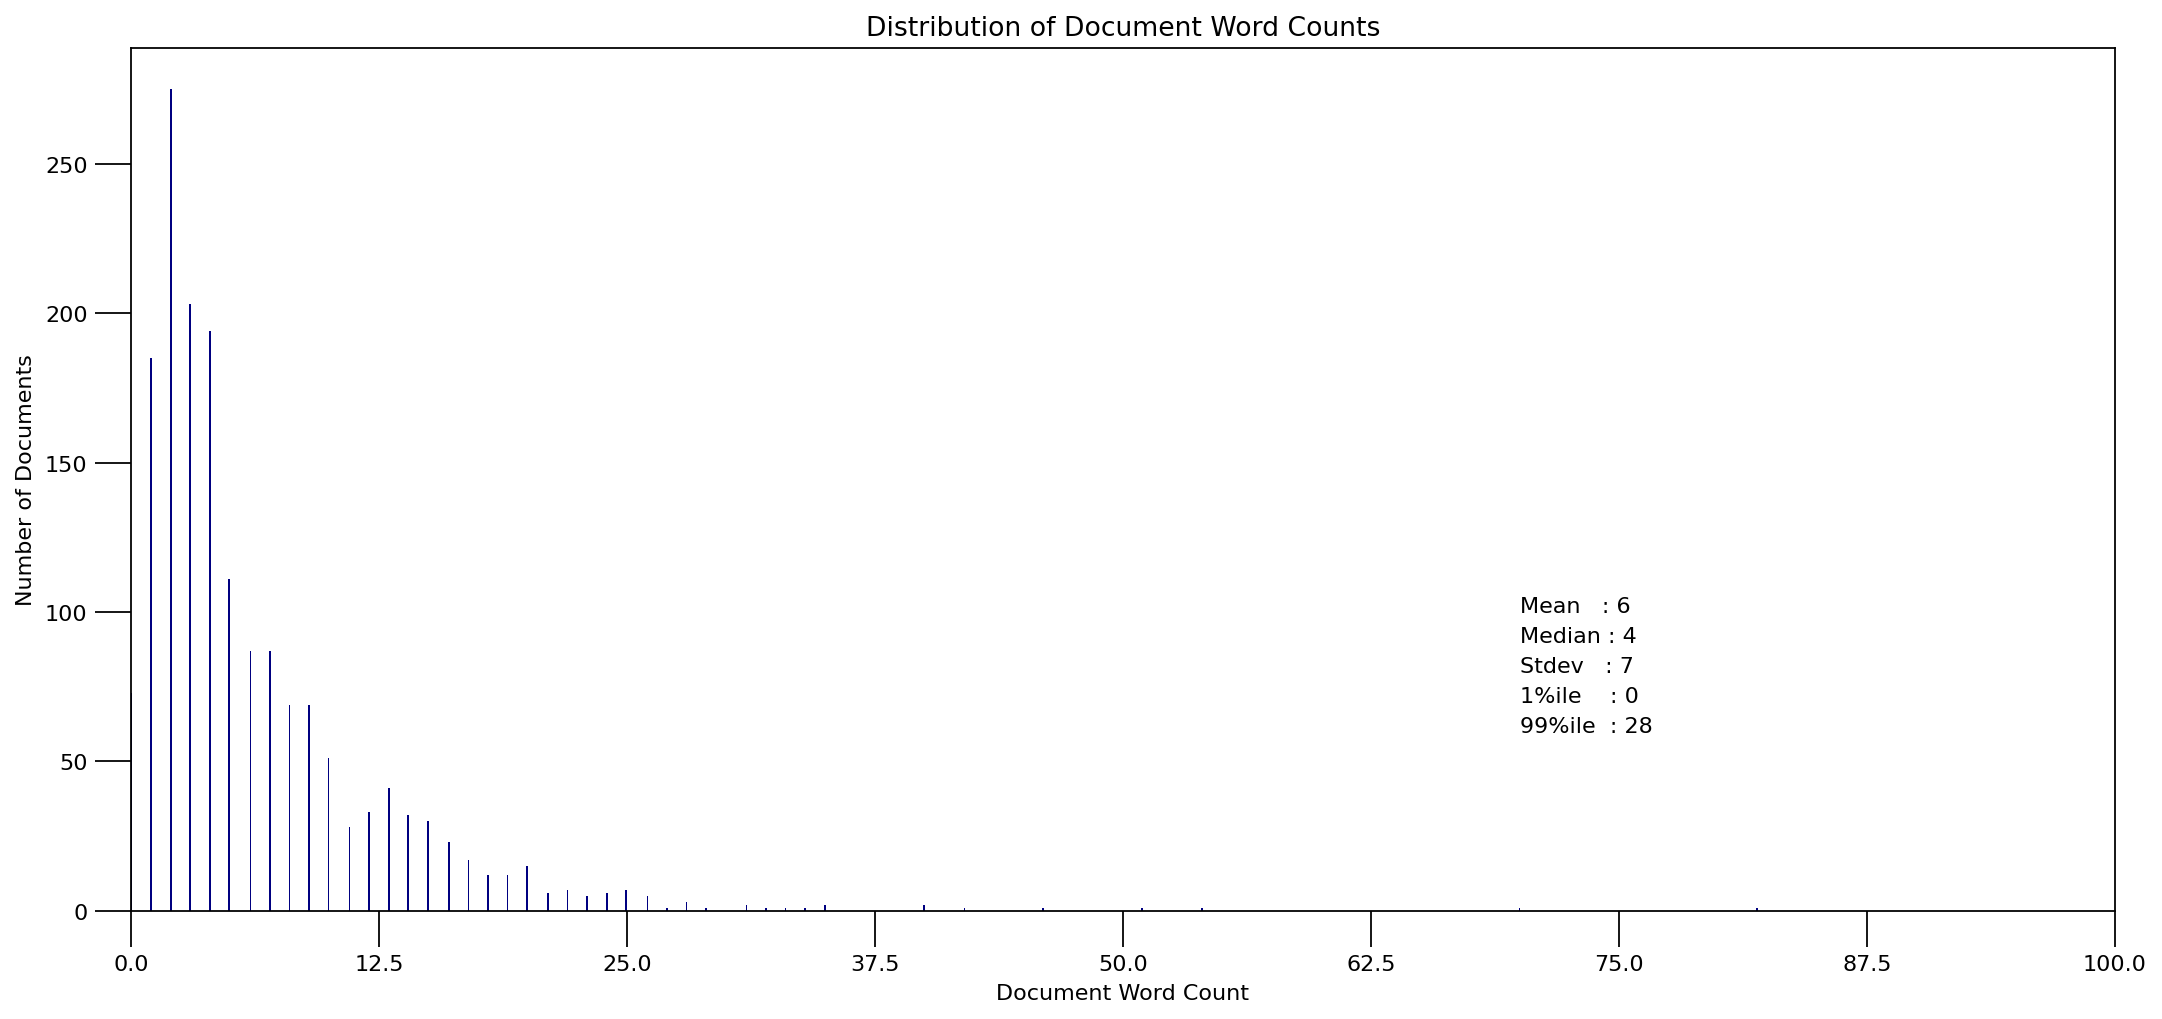

In [ ]:
# @title Let us look at the corpus and output model more precisely:
doc_lens = [len(d) for d in data_ready]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(70, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(70,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(70,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(70,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(70,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts')
plt.show()

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = {}
for i, topic in topics:
    if i  not in out:
        out[i] = {'word': [], 'importance': [], 'word_count': []}
    for word, weight in topic:
        out[i]["word"].append(word)
        out[i]["importance"].append(weight)
        out[i]["word_count"].append(counter[word])

<ipython-input-36-1f30213da533>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')


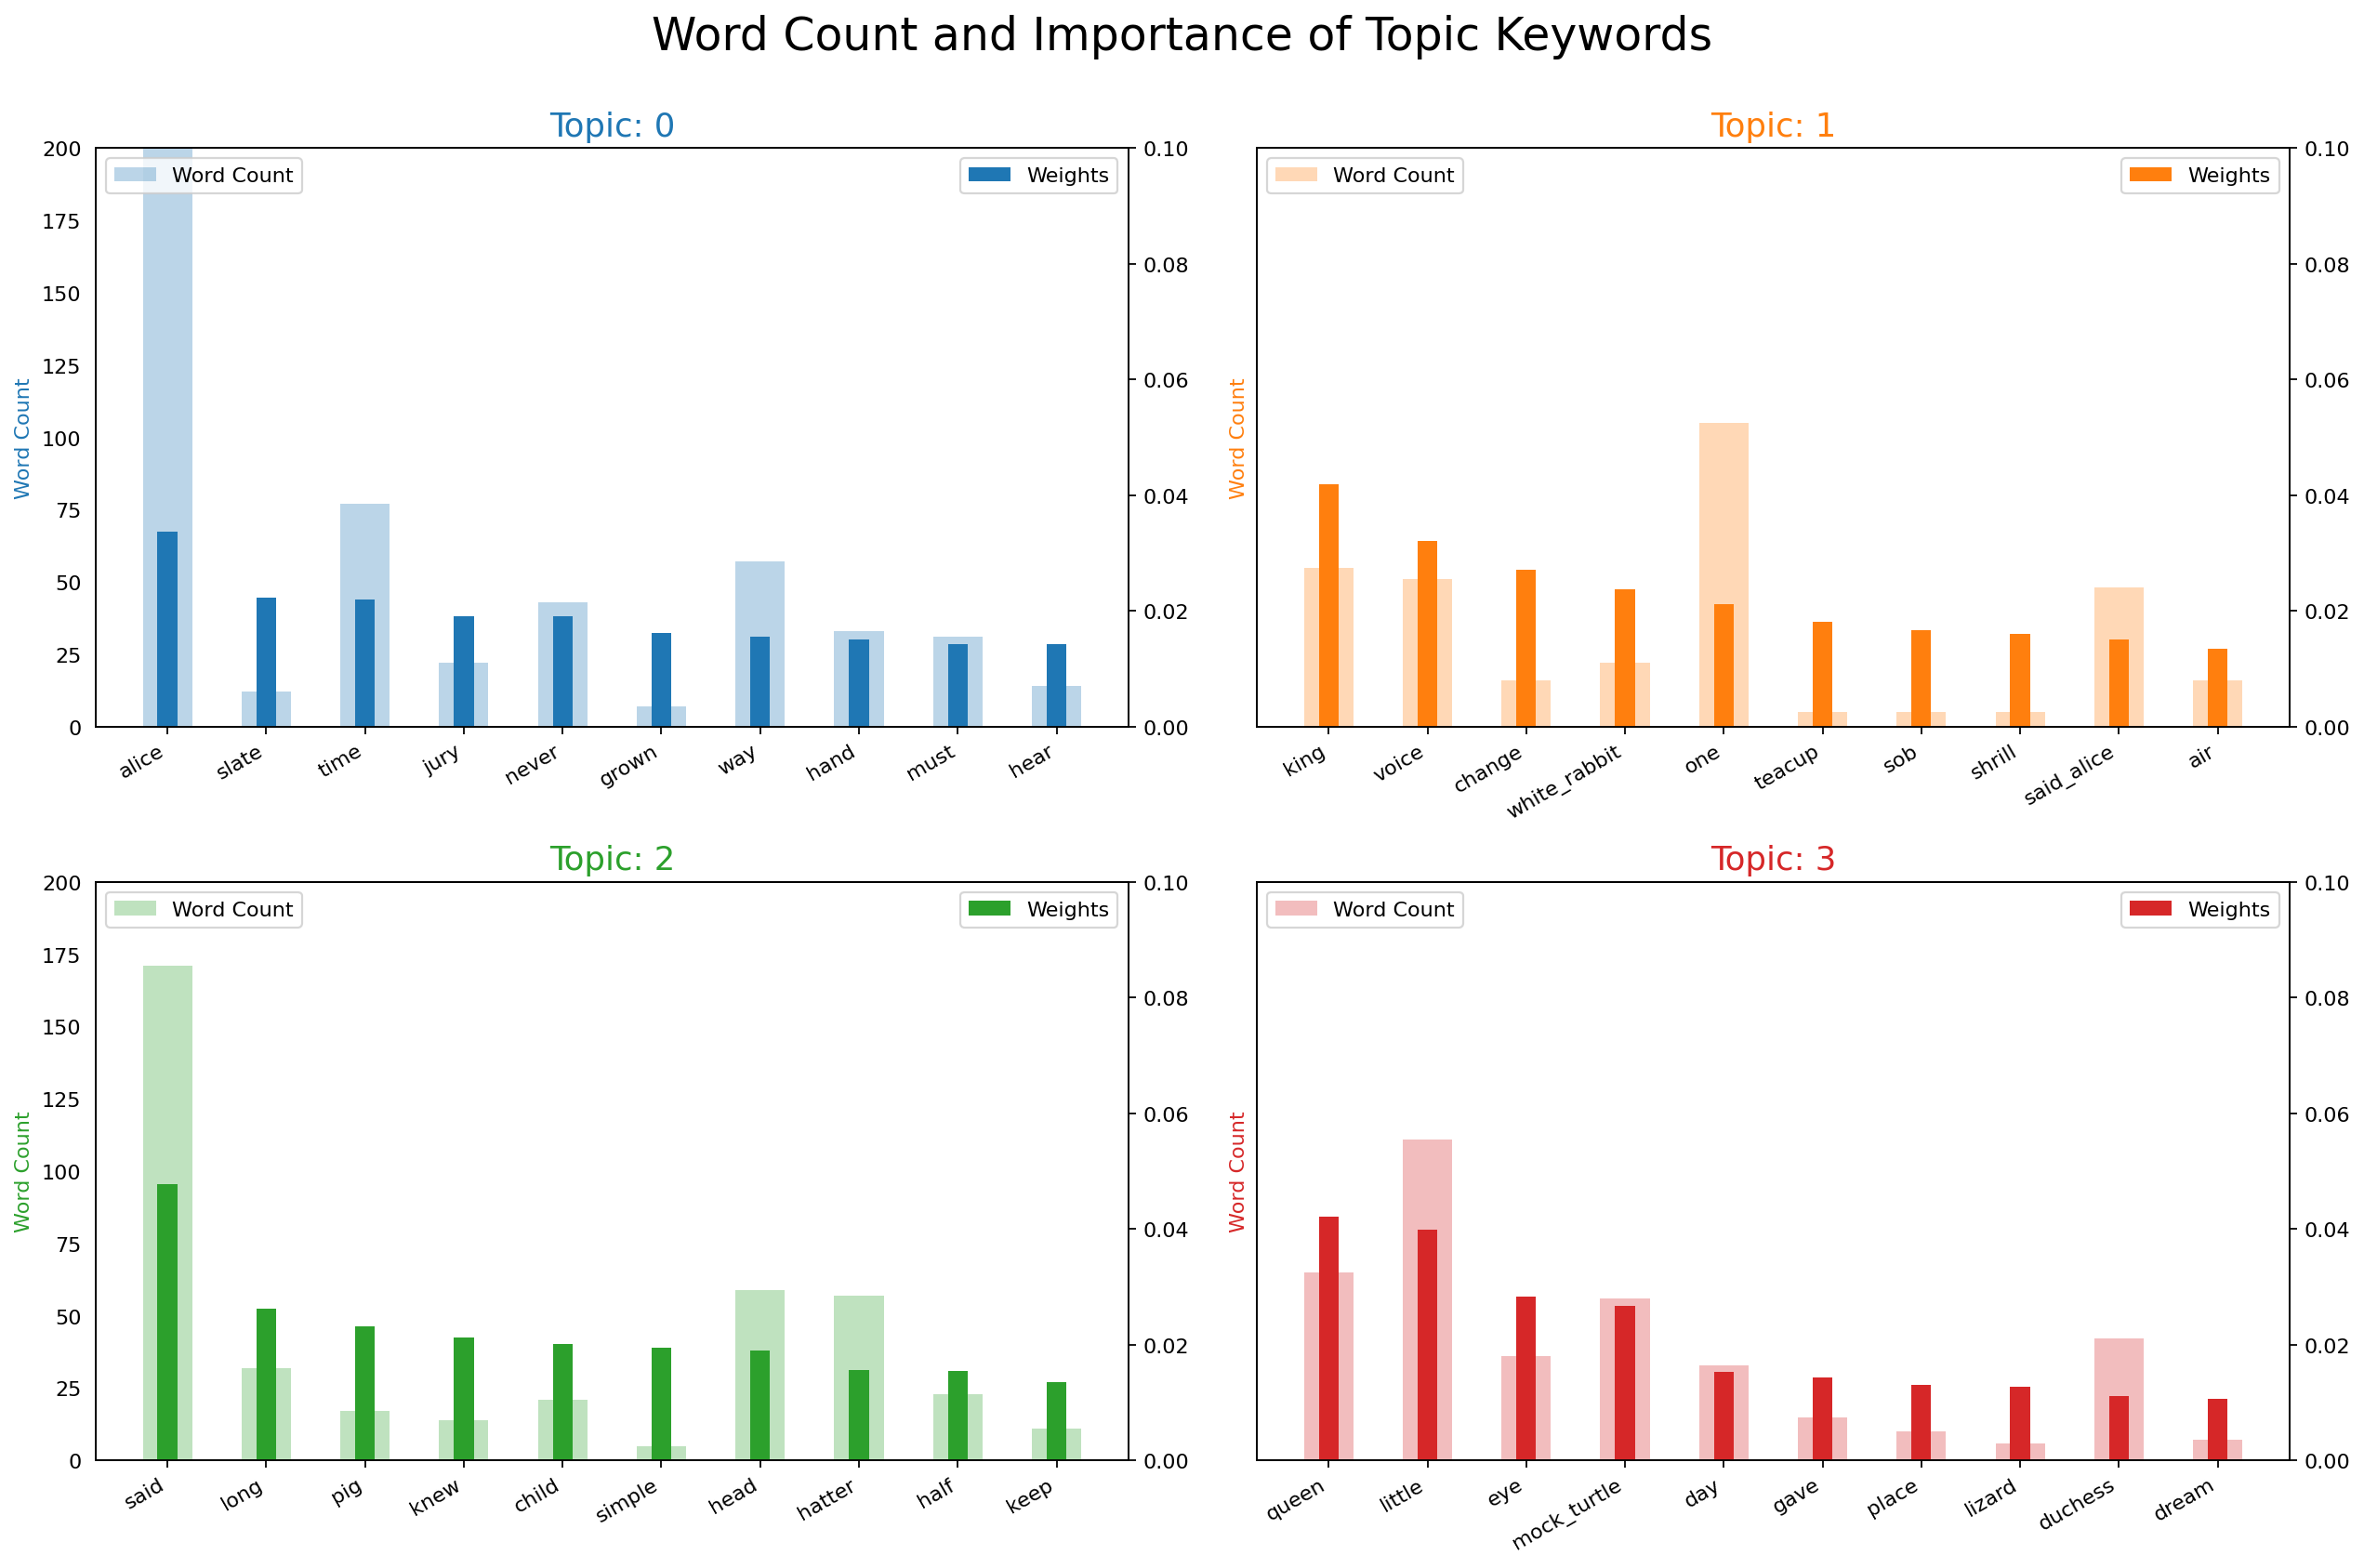

In [ ]:
# @title Plot Word Count and Weights of Topic Keywords
import matplotlib.colors as mcolors

fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=out[i], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=out[i], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.10); ax.set_ylim(0, 200)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(out[i]['word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()

In [ ]:
corp_cur = corpus[13]
topic_percs = np.array(lda_model[corp_cur][0])
topic = np.argmax(topic_percs[:, 1])
topic, topic_percs[topic, 1]

(1, 0.6586248874664307)

In [ ]:
lda_model[corpus[13:15]]

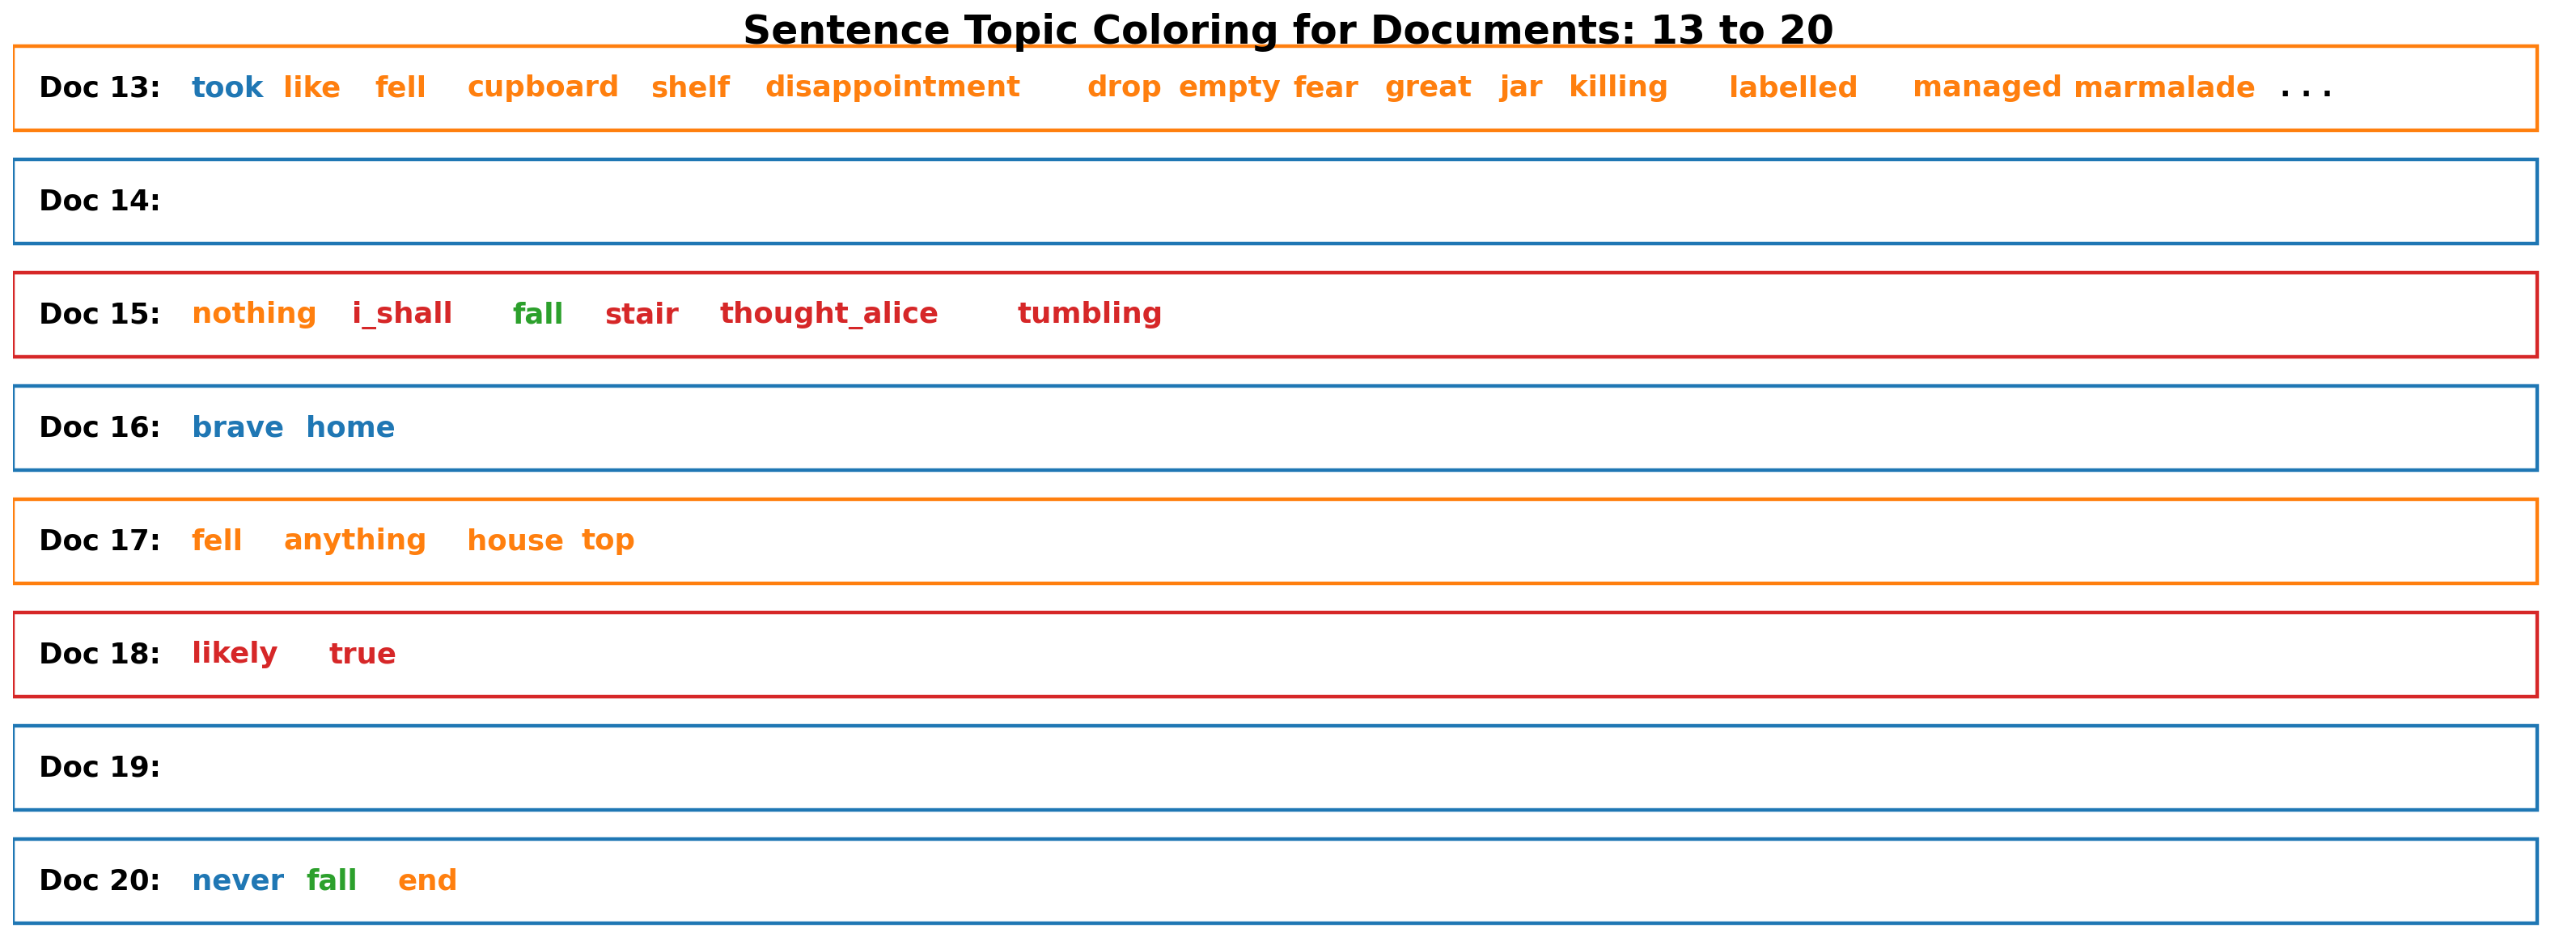

In [ ]:
# @title Sentence Coloring of N Sentences { run: "auto", display-mode: "form" }
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start=0, end=13, words_in_line=15):
    end += 1
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    text_params = dict(horizontalalignment='left', verticalalignment='center', fontsize=16, fontweight=700)

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        corp_cur = corp[i]
        topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
        word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
        ax.axis('off')
        text_params['transform'] = ax.transAxes
        ax.text(0.01, 0.5, f"Doc {start+i}: ",**text_params)

        # Draw Rectange
        topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
        ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

        word_pos = 0.07
        view_len, max_len = sorted([words_in_line, len(word_dominanttopic)])
        for j in range(view_len):
            word, topics = word_dominanttopic[j]
            ax.text(word_pos, 0.5, word, color=mycolors[topics], **text_params)
            word_pos += .009 * len(word)  # to move the word for the next iter
        if max_len > words_in_line:
            ax.text(word_pos, 0.5, '. . .', color='black', **text_params)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-1),
                 fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

start = 13 # @param {type:"integer"}
end = 20 # @param {type:"integer"}
sentences_chart(start=(start or 0), end=(end or 13))

For the final part we need an additional tool for visualization:

In [ ]:
# Install pyLDAVis (specific version for Google Collab)
%pip install -q pyLDAvis==2.1.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import warnings, logging
warnings.filterwarnings("ignore",category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word )
vis

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.086434  0.212319       1        1  30.246858
1      0.244420  0.007665       2        1  25.603772
2     -0.094393 -0.080803       3        1  23.925698
3     -0.063593 -0.139181       4        1  20.223671, topic_info=            Term        Freq       Total Category  logprob  loglift
149         said  122.000000  122.000000  Default  30.0000  30.0000
1712        king  114.000000  114.000000  Default  29.0000  29.0000
1377       queen   91.000000   91.000000  Default  28.0000  28.0000
207       little   86.000000   86.000000  Default  27.0000  27.0000
1          alice  108.000000  108.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
588      strange   16.666772   37.313121   Topic4  -4.8630   0.7924
1694       eager   14.743533   31.417751   Topic4  -4.9856   0.8417
16        sister   17.827204   64.623018   Topic4  -4.7957   0.3105
4     wonderland   16.220493   48.274920   Topic4  -4.8901   0.5077
920         jury   14.507072   76.403820   Topic4  -5.0018  -0.0631

[198 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1322      4  0.976844       added
198       2  0.994063         air
1         1  0.991501       alice
871       1  0.987690       asked
259       1  0.943763        away
...     ...       ...         ...
4         3  0.310720  wonderland
4         4  0.331435  wonderland
178       3  0.954205        word
1575      1  0.951681     writing
702       4  0.959844         yet

[258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])